In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, date
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np

# Load Data
* Handle missing values, duplicated values, outlier

In [52]:
total = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
total['Date'] = pd.to_datetime(total['Date'])

df = total.set_index('Date')
df.head()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_change,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-22,29890.5,29992.8,30497.8,29590.4,-0.0035,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
2023-06-21,29996.9,28307.7,30769.5,28270.5,0.0597,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2023-06-20,28307.7,26845.9,28393.0,26665.5,0.0544,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
2023-06-19,26845.9,26339.7,27029.7,26295.1,0.0192,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2023-06-18,26339.7,26515.0,26679.3,26290.6,-0.0066,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0


In [53]:
df.shape

(2661, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2661 entries, 2023-06-22 to 2016-03-10
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BTC_close               2661 non-null   float64
 1   BTC_open                2661 non-null   float64
 2   BTC_high                2661 non-null   float64
 3   BTC_low                 2661 non-null   float64
 4   BTC_change              2661 non-null   float64
 5   difficulty              2661 non-null   int64  
 6   addresses_active_count  2661 non-null   int64  
 7   sum_lock_weight         2661 non-null   int64  
 8   mean_lock_size_ytes     2661 non-null   float64
 9   total_fees_usd          2661 non-null   float64
 10  mean_hash_rate          2661 non-null   float64
 11  xfer_cnt                2661 non-null   int64  
 12  mean_tx_size_usd        2661 non-null   float64
 13  ETH                     2661 non-null   float64
 14  LTC                   

In [55]:
df.describe()

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_change,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
count,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2.661000e+03,2.661000e+03,2.661000e+03,2.661000e+03,2.661000e+03,...,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000
mean,16198.044645,16187.103983,16609.698835,15719.297557,0.002370,1.419070e+13,7.962736e+05,5.034587e+08,1.095519e+06,1.021368e+06,...,925.592837,80.186319,0.408651,0.048022,2.169717,1048.478316,13.216165,2159.918516,15688.512401,18248.837182
std,16290.779916,16291.619131,16719.630228,15803.195942,0.038762,1.304757e+13,1.925939e+05,8.576271e+07,2.764090e+05,1.983854e+06,...,1112.753630,65.733422,0.355440,0.086436,1.625285,764.552093,9.770914,1654.300036,11578.592833,13629.102838
min,408.200000,408.200000,410.500000,402.100000,-0.391800,1.584272e+11,3.747300e+05,2.317239e+08,4.421524e+05,1.298863e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4145.100000,4141.100000,4255.600000,3980.800000,-0.013500,1.931136e+12,6.435530e+05,4.459614e+08,9.179503e+05,1.624513e+05,...,157.400000,43.178000,0.203800,0.002021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9310.800000,9301.900000,9480.400000,9134.100000,0.001600,1.287684e+13,7.877480e+05,4.963208e+08,1.061447e+06,3.850408e+05,...,344.030000,61.500000,0.327150,0.003075,2.667000,1291.000000,16.573000,2642.220000,20660.000000,23953.000000
75%,23474.900000,23465.600000,24101.900000,22973.300000,0.018200,2.165934e+13,9.445770e+05,5.668920e+08,1.262568e+06,8.753665e+05,...,1578.110000,111.291000,0.516780,0.069791,3.266500,1749.800000,20.479000,3500.310000,24055.000000,29203.000000
max,67527.900000,67528.700000,68990.600000,66334.900000,0.255600,5.235044e+13,1.366494e+06,7.584308e+08,2.535436e+06,2.139776e+07,...,4808.380000,386.820000,2.780000,0.686880,4.937500,2069.400000,29.418000,4796.560000,33650.000000,36675.000000


<Axes: >

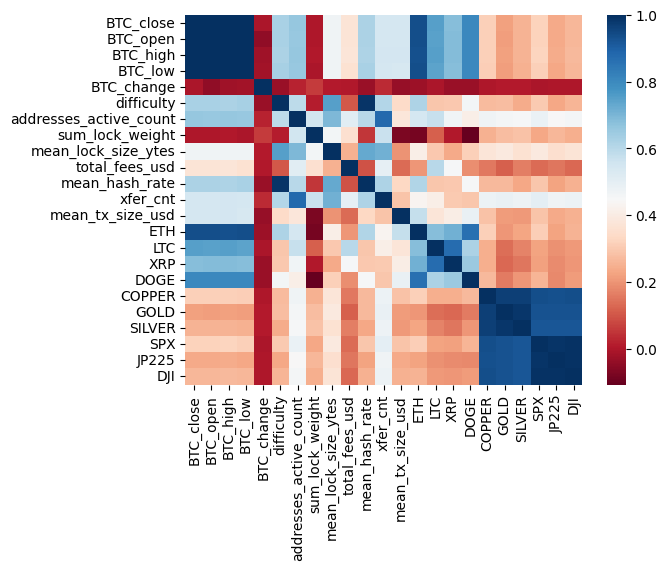

In [56]:
sns.heatmap(df.corr(), cmap="RdBu")

# Slpit Data (Testing, Training Data Sets)

In [57]:
from datetime import datetime

for index in total.index:
    total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y-%m-%d').date()

Start_day = date(2016, 3, 10)

Test_day = date(2018,5,10)

End_day = date(2018,9,30)


# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day)].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)


In [58]:
X_train_valid = train_dataset.drop(["Date", "BTC_close", "BTC_change"], axis=1)[:-1]
y_train_valid = train_dataset["BTC_close"][1:].reset_index(drop=True)

start_valid = date(2016,3,10)
valid_day = date(2018,1,10)
end_valid = date(2018,5,10)

train_valid = total[(total["Date"] >= start_valid) & (total["Date"] <= end_valid)].reset_index(drop = True)
train_val = train_valid[train_valid["Date"] < valid_day].reset_index(drop = True)
valid_val = train_valid[train_valid["Date"] >= valid_day].reset_index(drop = True)

X_train = train_val.drop(["Date", "BTC_close", "BTC_change"], axis=1)[:-1]
y_train = train_val["BTC_close"][1:].reset_index(drop=True)

X_valid = valid_val.drop(["Date", "BTC_close", "BTC_change"], axis=1)[:-1]
y_valid = valid_val["BTC_close"][1:].reset_index(drop=True)

X_test = test_dataset.drop(["Date", "BTC_close", "BTC_change"], axis=1)[:-1]
y_test = test_dataset["BTC_close"][1:].reset_index(drop=True)

In [59]:
test_ratio = len(test_dataset) / len(total)
valid_ratio = len(valid_val) / len(train_valid)

print("Tỉ lệ test_data/total:", test_ratio)
print("Tỉ lệ valid_data/train_valid:", valid_ratio)

Tỉ lệ test_data/total: 0.15401069518716579
Tỉ lệ valid_data/train_valid: 0.1527777777777778


In [60]:
print("Training_Valid Features Shape:", X_train_valid.shape)
print("Training_Valid Labels Shape:", y_train_valid.shape)

print("Train Features Shape:", X_train.shape)
print("Train Labels Shape:", y_train.shape)

print("Valid Features Shape:", X_valid.shape)
print("Valid Labels Shape:", y_valid.shape)

print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training_Valid Features Shape: (790, 21)
Training_Valid Labels Shape: (790,)
Train Features Shape: (670, 21)
Train Labels Shape: (670,)
Valid Features Shape: (120, 21)
Valid Labels Shape: (120,)
Testing Features Shape: (143, 21)
Testing Labels Shape: (143,)


In [61]:
print('{:0.1f} years of data in the training set'.format(X_train_valid.shape[0] / 365.))
print('{:0.1f} years of data in the test set'.format(X_test.shape[0] / 365.))

2.2 years of data in the training set
0.4 years of data in the test set


# Load Model

In [62]:
#import sklearn modules
import time
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

### Examine the Default Random Forest to Determine Parameters


1. We will use these parameters as a starting point. 
2. Based on sklearn's random forest documentation, I determined what features to change and what options are available.

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Search with Cross Validation

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [65]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [66]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 10,
 'bootstrap': True}

#### Top 10 best_params_

In [67]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [68]:
print((len(rf_random.cv_results_["params"])))
report(rf_random.cv_results_)

100
Model with rank: 1
Mean validation score: -1404.102 (std: 1826.890)
Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 2
Mean validation score: -1404.701 (std: 1822.896)
Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 3
Mean validation score: -1406.021 (std: 1826.175)
Parameters: {'n_estimators': 900, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}

Model with rank: 4
Mean validation score: -1410.997 (std: 1831.238)
Parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'bootstrap': True}

Model with rank: 5
Mean validation score: -1415.083 (std: 1745.836)
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': N

### Evaluation Function

In [69]:
y_test = np.array(y_test)

def ACC(model, X_test, y_test, X_train_valid, y_train_valid):    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_valid)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_valid, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_valid,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    sns.displot(y_test - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_test, color = 'red', label="Bitcoin Price")
    ax.plot(y_pred, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression for Period 2")
    plt.legend()
    plt.show()
    
    print()
    
def AUC(model, X_valid, y_valid, X_train, y_train):    
    y_pred = model.predict(X_valid)
    y_train_pred = model.predict(X_train)
    
    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train set")
    #RMSE
    print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

    #MAPE
    print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train,y_train_pred))
    print()
    

    print("Test accuracy for test set")
    #RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print("Root Mean Square Error (RMSE):", rmse)

    #MAPE
    mape = mean_absolute_percentage_error(y_valid, y_pred)
    print(" Mean Absolute Percentage Error (MAPE):", mape)
    print()
    
    sns.displot(y_valid - y_pred, kde=True)
    plt.xlabel('y_test - y_pred')
    plt.ylabel('count')
    plt.show()
    
    print()
    sns.scatterplot(x=y_valid, y=y_pred)
    plt.xlabel('y_test')
    plt.ylabel('Predicted')
    plt.show()
    
    print()
    fig, ax = plt.subplots(1, 1, figsize=(14, 5))
    ax.plot(y_valid, color = 'red', label="Bitcoin Price")
    ax.plot(y_pred, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # .3f
    plt.title("Random Forest Regression for Period 2")
    plt.legend()
    plt.show()
    
    print()

    train_valid['Date'] = pd.to_datetime(train_valid['Date'][:-1])
    test_dataset['Date'] = pd.to_datetime(test_dataset['Date'][:len(y_valid)])

    fig, ax = plt.subplots(figsize=(25, 5))

    ax.plot(train_valid['Date'][:-1], train_valid['BTC_close'][1:], color='blue', label="Training Data")
    ax.plot(valid_val['Date'][:-1], y_valid, color='orange', label="Validation Data")
    ax.plot(valid_val['Date'][:-1], y_pred, color='green', label="Predicted Bitcoin Price", linestyle="dashed")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # Format the y-axis
    plt.legend()
    plt.show()


### Evaluate the Default Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 67.89109551552771
Mean Absolute Percentage Error (MAPE): 0.0033329287620196403

Test accuracy for test set
Root Mean Square Error (RMSE): 735.4290454892074
 Mean Absolute Percentage Error (MAPE): 0.0677345293536817



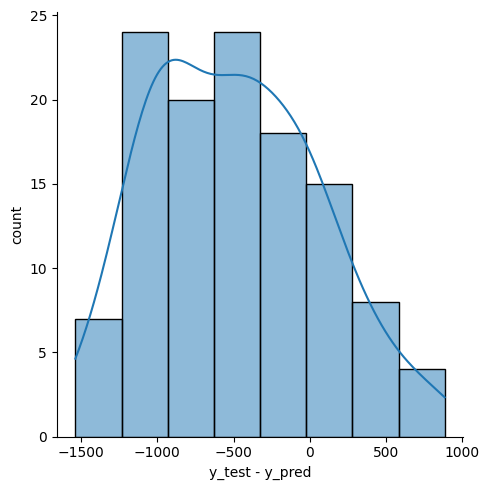

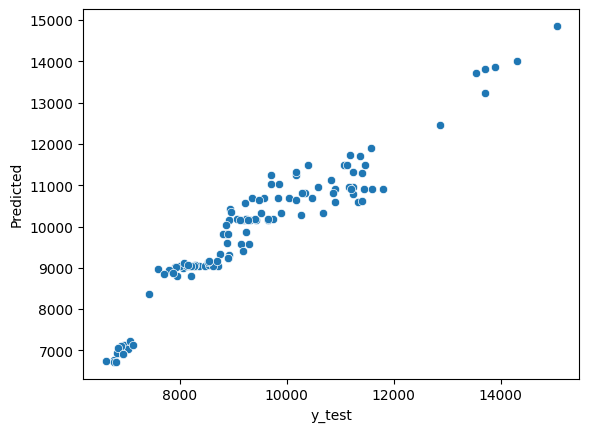

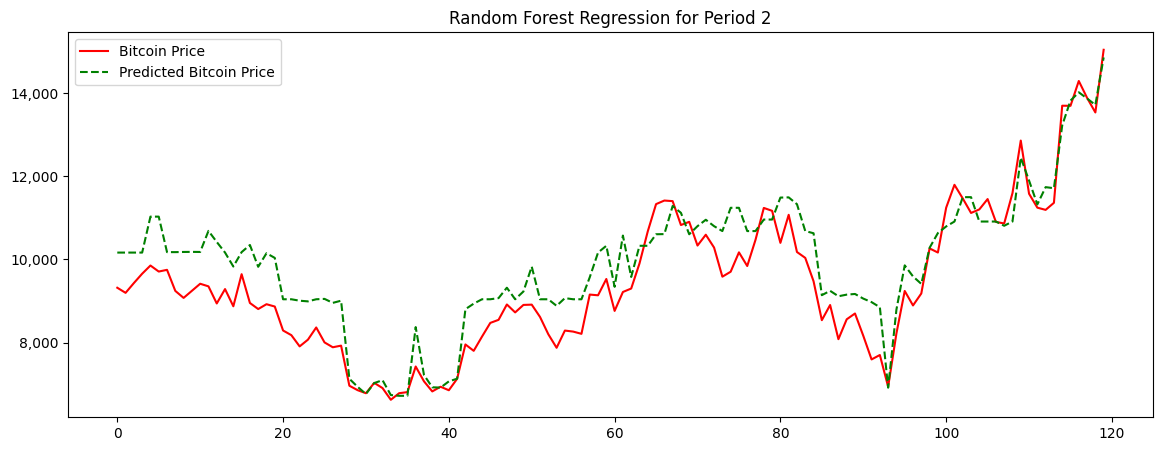

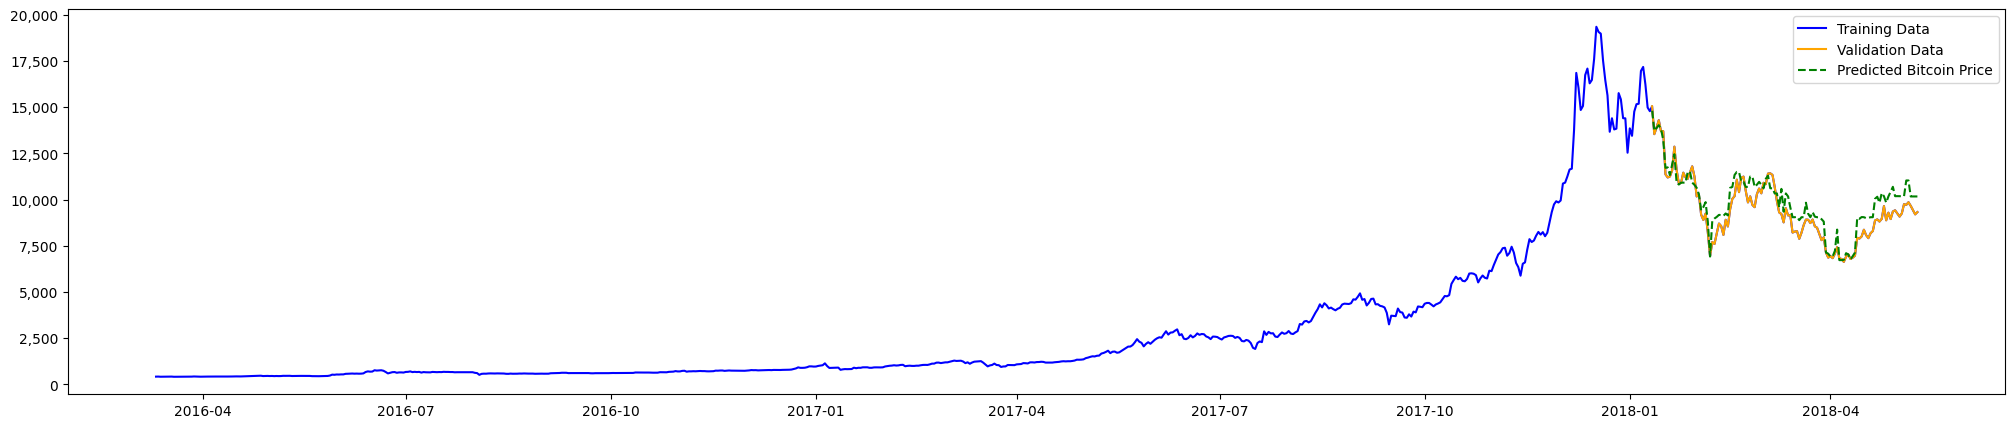

In [70]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = AUC(base_model, X_valid, y_valid, X_train, y_train)

### Evaluate the Best Random Search Model

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 51.357726564799016
Mean Absolute Percentage Error (MAPE): 0.003109455310867854

Test accuracy for test set
Root Mean Square Error (RMSE): 957.6691986098116
 Mean Absolute Percentage Error (MAPE): 0.09640409582942758



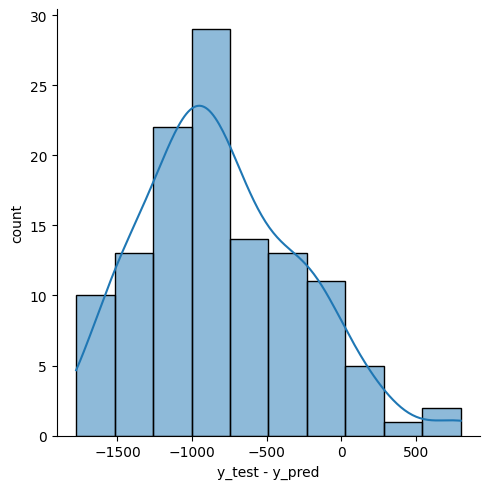

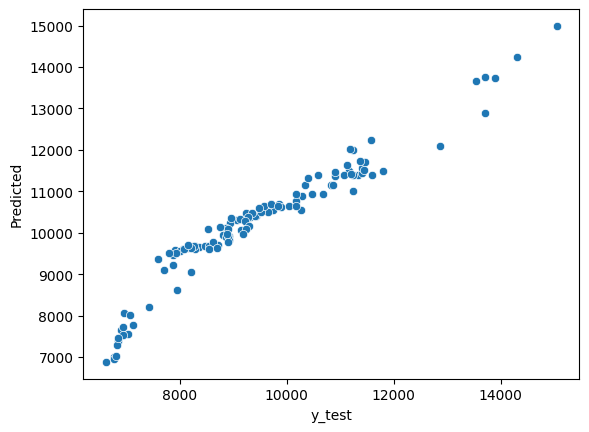

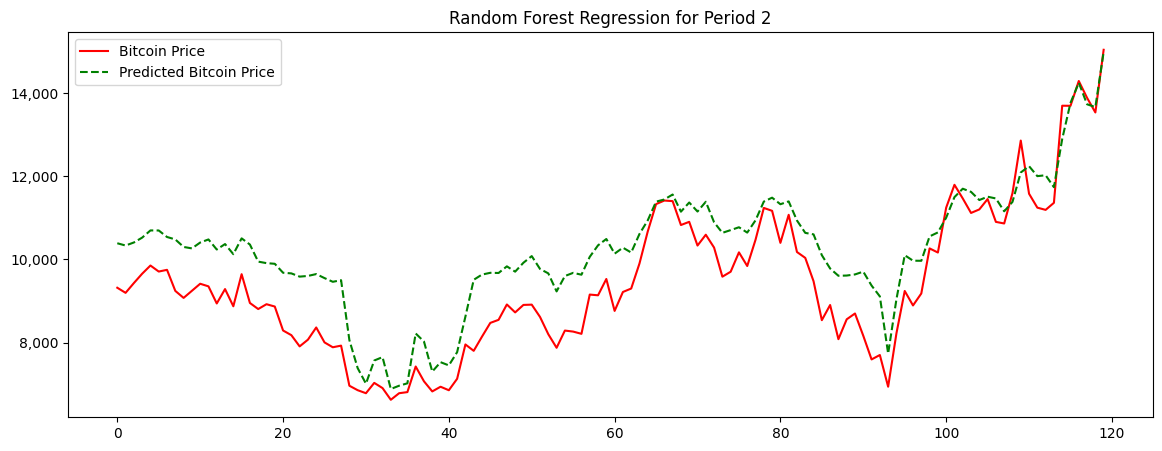

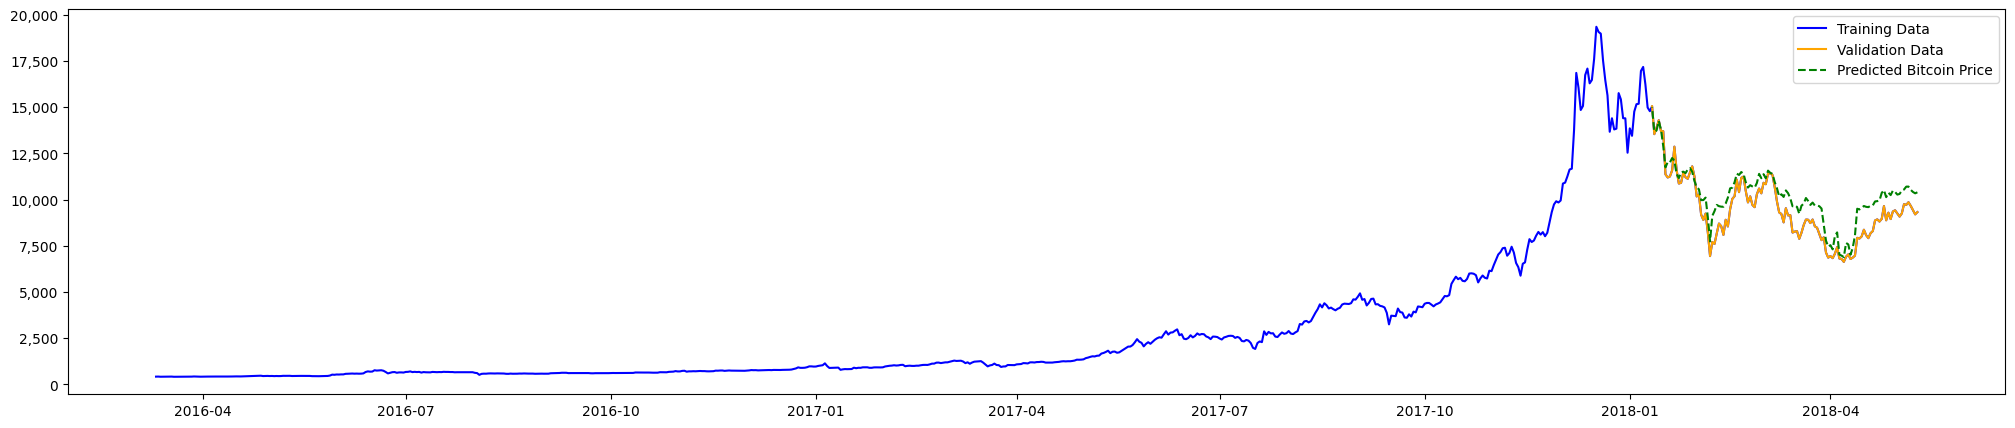

In [71]:
best_random = rf_random.best_estimator_
random_accuracy = AUC(best_random, X_valid, y_valid, X_train, y_train)

## Grid Search

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [72]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [6,8,10, None],
    'max_features': [None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 300, 400, 500]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, return_train_score=True)

In [73]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [74]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

#### Evaluate the Best Model from Grid Search

Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 45.67805652316957
Mean Absolute Percentage Error (MAPE): 0.002605592317723589

Test accuracy for test set
Root Mean Square Error (RMSE): 819.8888397527994
 Mean Absolute Percentage Error (MAPE): 0.08241337034645563



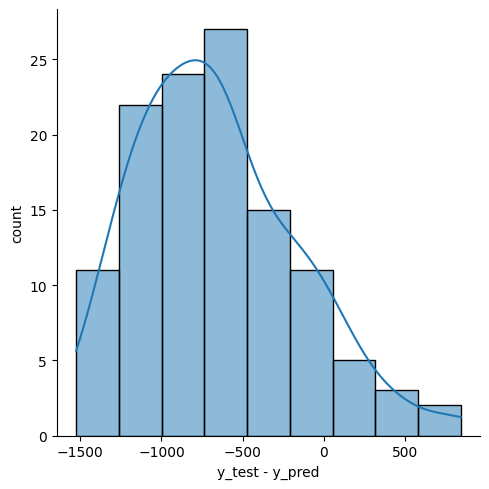

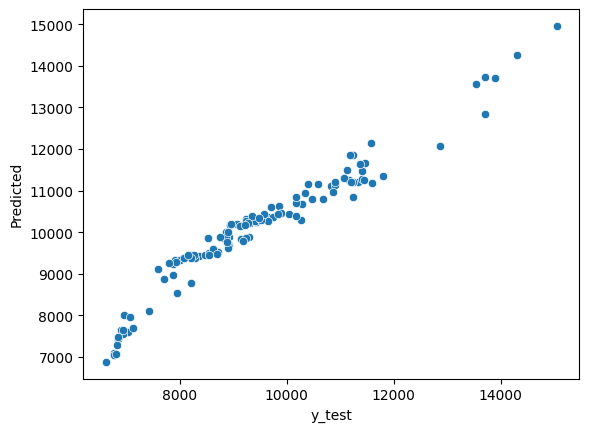

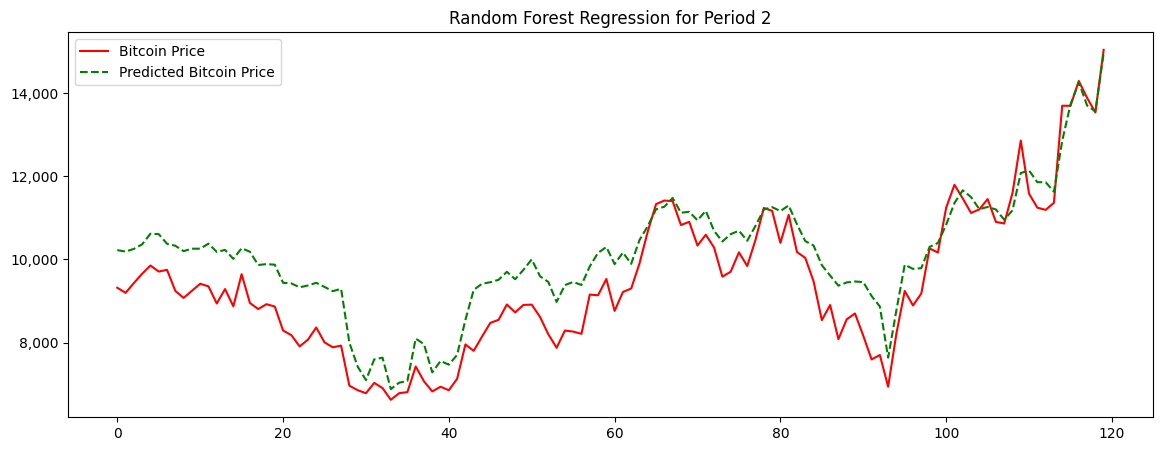

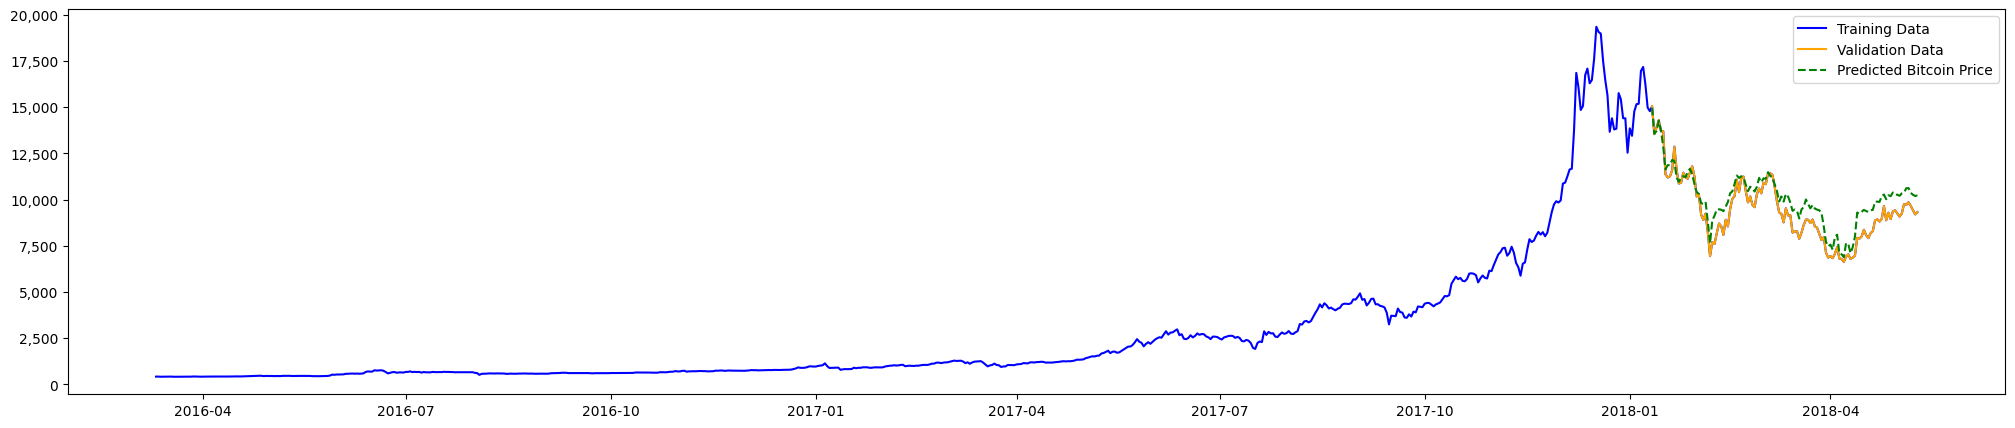

In [75]:
best_grid = grid_search.best_estimator_
grid_accuracy = AUC(best_grid, X_valid, y_valid, X_train, y_train)

## Final Model & Evaluation

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
******************************
Test accuracy for train set
Root Mean Square Error (RMSE): 320.69442161348564
Mean Absolute Percentage Error (MAPE): 0.01460957599919209

Test accuracy for test set
Root Mean Square Error (RMSE): 634.9137733345788
 Mean Absolute Percentage Error (MAPE): 0.06347497919905394



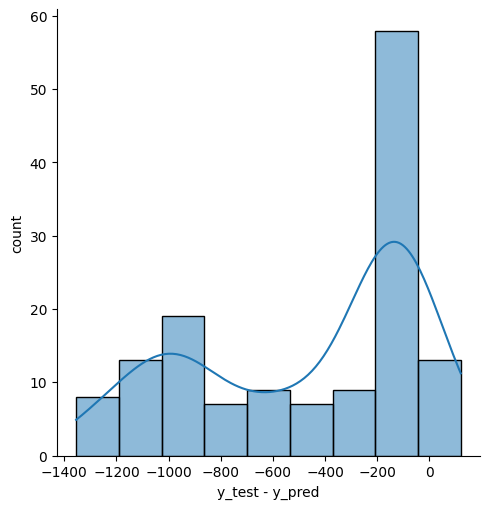

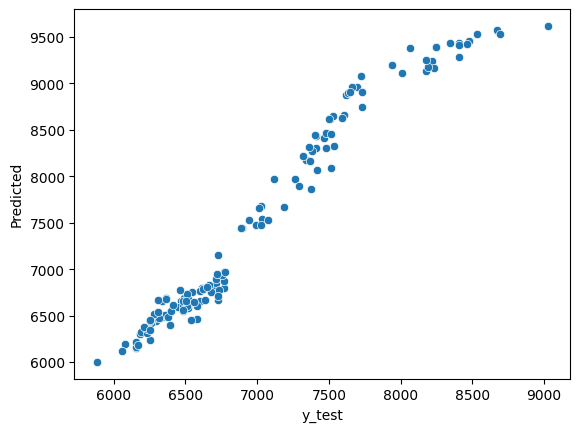

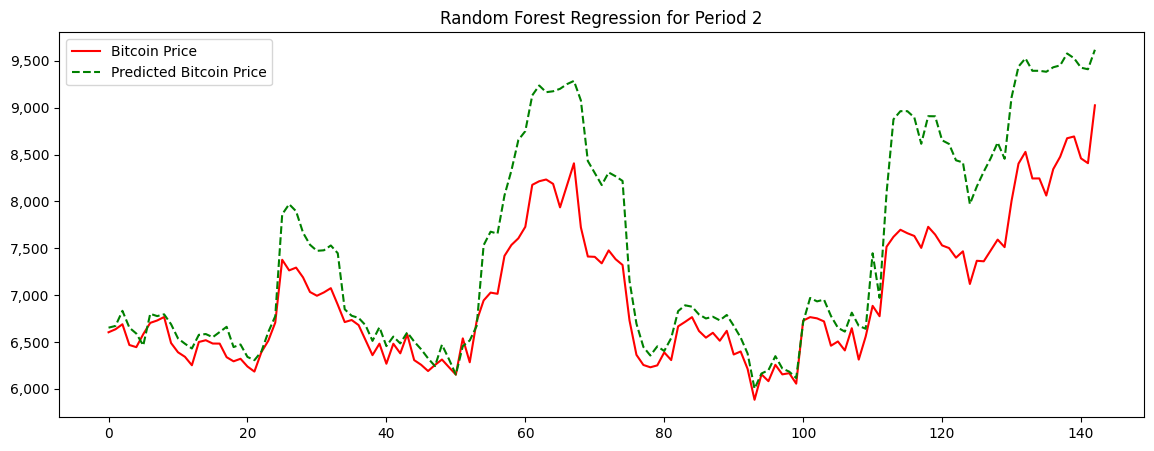

In [76]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = ACC(final_model, X_test, y_test, X_train_valid, y_train_valid)

## Comparison of All Improvement Techniques

In [77]:
import time

In [78]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test):
    n_features = X_train.shape[1]
    n_trees = model.get_params()['n_estimators']
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions_test = []
    predictions_train_valid = []
    predictions_valid = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train, y_train)
        predictions_valid.append(model.predict(X_valid))
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    for _ in range(10):
        start_time = time.time()
        model.fit(X_train_valid, y_train_valid)
        predictions_train_valid.append(model.predict(X_train_valid))
        end_time = time.time()
        run_times.append(end_time - start_time)
        predictions_test.append(model.predict(X_test))
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions_test = np.mean(np.array(predictions_test), axis = 0)
    predictions_valid = np.mean(np.array(predictions_valid), axis = 0)
    predictions_train_valid = np.mean(np.array(predictions_train_valid), axis = 0)
   

    print('Model Performance')
    print(30*'*')
    print("Test accuracy for train_valid set")
    #RMSE
    rmse_train_valid = np.sqrt(mean_squared_error(y_train_valid, predictions_train_valid))
    print("Root Mean Square Error (RMSE):", rmse_train_valid)

    #MAPE
    mape_train_valid = mean_absolute_percentage_error(y_train_valid, predictions_train_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_train_valid)
    print()
    
    print("Test accuracy for valid set")
    #RMSE
    rmse_valid = np.sqrt(mean_squared_error(y_valid, predictions_valid))
    print("Root Mean Square Error (RMSE):", rmse_valid)

    #MAPE
    mape_valid = mean_absolute_percentage_error(y_valid, predictions_valid)
    print("Mean Absolute Percentage Error (MAPE):", mape_valid)
    print()

    print("Test accuracy for test set")
    #RMSE
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    print("Root Mean Square Error (RMSE):", rmse_test)

    #MAPE
    mape_test = mean_absolute_percentage_error(y_test, predictions_test)
    print(" Mean Absolute Percentage Error (MAPE):", mape_test)
    print()
    
    
    # Return results in a dictionary
    results = {'time': run_time, 'RMSE_train_valid': rmse_train_valid, 'RMSE_valid': rmse_valid, 'RMSE_test': rmse_test, 'MAPE_train_valid' : mape_train_valid, 'MAPE_valid': mape_valid, 'MAPE_test': mape_test, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [79]:
#### Default

In [80]:
base_results = evaluate_model(base_model, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)

Model Performance
******************************
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 48.516146030947155
Mean Absolute Percentage Error (MAPE): 0.003048301105885305

Test accuracy for valid set
Root Mean Square Error (RMSE): 735.4290454892072
Mean Absolute Percentage Error (MAPE): 0.0677345293536817

Test accuracy for test set
Root Mean Square Error (RMSE): 89.69319298103308
 Mean Absolute Percentage Error (MAPE): 0.010305521826844263



In [81]:
base_results['model'] = 'base_model'

In [82]:
base_results

{'time': 0.23884469270706177,
 'RMSE_train_valid': 48.516146030947155,
 'RMSE_valid': 735.4290454892072,
 'RMSE_test': 89.69319298103308,
 'MAPE_train_valid': 0.003048301105885305,
 'MAPE_valid': 0.0677345293536817,
 'MAPE_test': 0.010305521826844263,
 'n_trees': 10,
 'n_features': 21,
 'model': 'base_model'}

#### Random Search Best Model

In [83]:
random_results = evaluate_model(best_random, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)

Model Performance
******************************
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 44.54772969448085
Mean Absolute Percentage Error (MAPE): 0.0024735741443392156

Test accuracy for valid set
Root Mean Square Error (RMSE): 957.6691986098116
Mean Absolute Percentage Error (MAPE): 0.09640409582942758

Test accuracy for test set
Root Mean Square Error (RMSE): 43.950641277496054
 Mean Absolute Percentage Error (MAPE): 0.004966963765943302



In [84]:
random_results['model'] = 'best_random'

In [85]:
random_results

{'time': 5.7277062892913815,
 'RMSE_train_valid': 44.54772969448085,
 'RMSE_valid': 957.6691986098116,
 'RMSE_test': 43.950641277496054,
 'MAPE_train_valid': 0.0024735741443392156,
 'MAPE_valid': 0.09640409582942758,
 'MAPE_test': 0.004966963765943302,
 'n_trees': 300,
 'n_features': 21,
 'model': 'best_random'}

#### First Grid Search Best Model

In [86]:
first_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)
first_grid_results['model'] = 'first_grid'

Model Performance
******************************
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 40.820913241472084
Mean Absolute Percentage Error (MAPE): 0.0020885289808313377

Test accuracy for valid set
Root Mean Square Error (RMSE): 819.8888397527995
Mean Absolute Percentage Error (MAPE): 0.08241337034645563

Test accuracy for test set
Root Mean Square Error (RMSE): 42.100387553225744
 Mean Absolute Percentage Error (MAPE): 0.004895154136539384



In [87]:
first_grid_results

{'time': 6.861968159675598,
 'RMSE_train_valid': 40.820913241472084,
 'RMSE_valid': 819.8888397527995,
 'RMSE_test': 42.100387553225744,
 'MAPE_train_valid': 0.0020885289808313377,
 'MAPE_valid': 0.08241337034645563,
 'MAPE_test': 0.004895154136539384,
 'n_trees': 300,
 'n_features': 21,
 'model': 'first_grid'}

#### Second Grid Search Best Model

In [88]:
second_grid_results = evaluate_model(best_grid, X_train_valid, y_train_valid, X_valid, y_valid, X_test, y_test)
second_grid_results['model'] = 'second_grid'

Model Performance
******************************
Test accuracy for train_valid set
Root Mean Square Error (RMSE): 40.820913241472084
Mean Absolute Percentage Error (MAPE): 0.0020885289808313377

Test accuracy for valid set
Root Mean Square Error (RMSE): 819.8888397527995
Mean Absolute Percentage Error (MAPE): 0.08241337034645563

Test accuracy for test set
Root Mean Square Error (RMSE): 42.100387553225744
 Mean Absolute Percentage Error (MAPE): 0.004895154136539384



In [89]:
second_grid_results

{'time': 4.910967469215393,
 'RMSE_train_valid': 40.820913241472084,
 'RMSE_valid': 819.8888397527995,
 'RMSE_test': 42.100387553225744,
 'MAPE_train_valid': 0.0020885289808313377,
 'MAPE_valid': 0.08241337034645563,
 'MAPE_test': 0.004895154136539384,
 'n_trees': 300,
 'n_features': 21,
 'model': 'second_grid'}

## Comparison

In [90]:
comparison = {
    'RMSE_train_valid': [],
    'RMSE_valid': [],
    'RMSE_test': [],
    'MAPE_train_valid': [],
    'MAPE_valid': [],
    'MAPE_test': [],
    'model': [],
    'n_features': [],
    'n_trees': [],
    'time': []}
for model in [base_results, random_results, first_grid_results, second_grid_results]:
    comparison['RMSE_train_valid'].append(round(model['RMSE_train_valid'], 3))
    comparison['RMSE_valid'].append(round(model['RMSE_valid'], 3))
    comparison['RMSE_test'].append(round(model['RMSE_test'], 3))
    comparison['MAPE_train_valid'].append(round(model['MAPE_train_valid'], 3))
    comparison['MAPE_valid'].append(round(model['MAPE_valid'], 3))
    comparison['MAPE_test'].append(round(model['MAPE_test'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))


In [91]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [92]:
comparison[['model', 'RMSE_train_valid', 'RMSE_valid', 'RMSE_test', 'MAPE_train_valid', 'MAPE_valid', 'MAPE_test', 'n_features', 'n_trees', 'time']]


,model,RMSE_train_valid,RMSE_valid,RMSE_test,MAPE_train_valid,MAPE_valid,MAPE_test,n_features,n_trees,time
0,base_model,48.516,735.429,89.693,0.003,0.068,0.010,21,10,0.2388
1,best_random,44.548,957.669,43.951,0.002,0.096,0.005,21,300,5.7277
2,first_grid,40.821,819.889,42.100,0.002,0.082,0.005,21,300,6.8620
3,second_grid,40.821,819.889,42.100,0.002,0.082,0.005,21,300,4.9110


## Plotting 

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

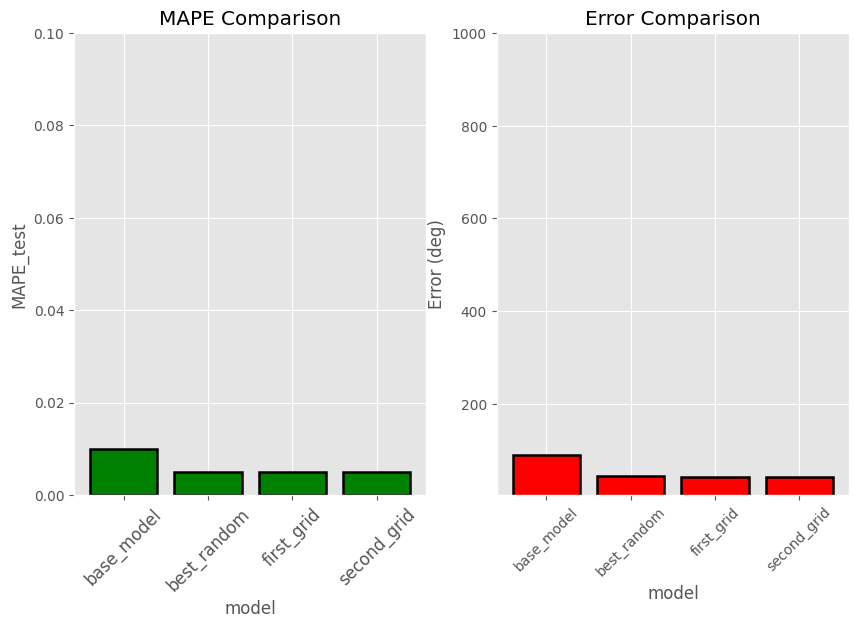

In [94]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['MAPE_test'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 0, ymax = 0.1)
plt.xlabel('model'); plt.ylabel('MAPE_test'); plt.title('MAPE Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['RMSE_test'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 3.5, ymax = 1000)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

## Importance Feature

In [95]:
features = X_train.columns
# Get numerical feature importances
importances = list(final_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: BTC_open             Importance: 0.8438
Variable: BTC_low              Importance: 0.0729
Variable: BTC_high             Importance: 0.0585
Variable: difficulty           Importance: 0.0189
Variable: total_fees_usd       Importance: 0.0054
Variable: LTC                  Importance: 0.0003
Variable: addresses_active_count Importance: 0.0
Variable: sum_lock_weight      Importance: 0.0
Variable: mean_lock_size_ytes  Importance: 0.0
Variable: mean_hash_rate       Importance: 0.0
Variable: xfer_cnt             Importance: 0.0
Variable: mean_tx_size_usd     Importance: 0.0
Variable: ETH                  Importance: 0.0
Variable: XRP                  Importance: 0.0
Variable: DOGE                 Importance: 0.0
Variable: COPPER               Importance: 0.0
Variable: GOLD                 Importance: 0.0
Variable: SILVER               Importance: 0.0
Variable: SPX                  Importance: 0.0
Variable: JP225                Importance: 0.0
Variable: DJI                  Importanc

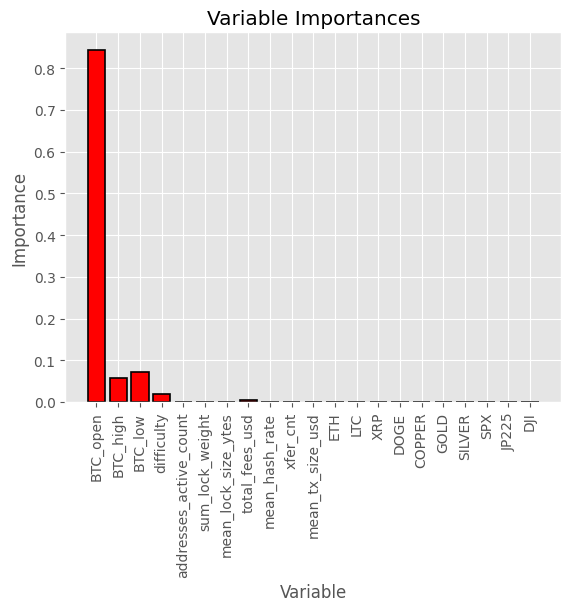

In [96]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

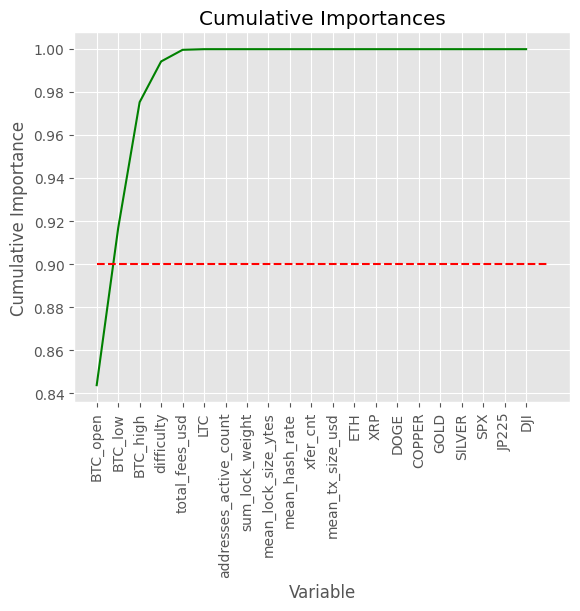

In [97]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [98]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
num = np.where(cumulative_importances > 0.9)[0][0] + 1
print('Number of features for 90% importance:', num)

Number of features for 90% importance: 2


In [99]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num]]
print(important_feature_names)

['BTC_open', 'BTC_low']


In [100]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_model.estimators_[12]
export_graphviz(visual_tree, out_file = '/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/ML20222.PredictionBitcoin/Members/Mlinh/images/best_tree_period1.dot', feature_names = X_train.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

In [101]:
# Use pydot for converting to an image file
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/ML20222.PredictionBitcoin/Members/Mlinh/images/best_tree_period1.dot')
graph.write_png('/Users/ibulmnie/Documents/GitHub/ML20222.PredictionBitcoin/ML20222.PredictionBitcoin/Members/Mlinh/images/best_tree_period1.png')